## Analysis Data Project [Air Quality Dataset(PRSA_Data_Aotizhongxin.csv)]

- Name        : Jessica Alva N
- Email       : jessicaalva@students.amikom.ac.id
- ID Dicoding : https://www.dicoding.com/users/jessica_alva/academies

## Define Questions

- What is the relationship between PM2.5 and other variables?
- How does air quality vary based on PM2.5(pollution) over time, and which year has the highest average of air pollution?
- How is the correlation between PM2.5 and wind direction?

## Import All Packages/Library

In [ ]:
#read and analyse the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install windrose

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv('/content/PRSA_Data_Aotizhongxin.csv')

### Assesing Data

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
# to confirm the shape of the data
df.shape

(35064, 18)

In [ ]:
#view list of the columns in the dataframe
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
#ensure there are missing value
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [ ]:
#percentage of pollutant filtering by year 2015
missing_percentage = df.isnull().mean() * 100
cols = ['PM2.5', 'PM10']
data_missing = df[cols].isnull()
data_missing['year'] = df['year']
data_missing_2015 = data_missing[data_missing['year'] == 2015]

missing_percentage, data_missing_2015.sum()

(No         0.000000
 year       0.000000
 month      0.000000
 day        0.000000
 hour       0.000000
 PM2.5      2.638033
 PM10       2.047684
 SO2        2.666553
 NO2        2.917522
 CO         5.065024
 O3         4.902464
 TEMP       0.057039
 PRES       0.057039
 DEWP       0.057039
 RAIN       0.057039
 wd         0.231006
 WSPM       0.039927
 station    0.000000
 dtype: float64,
 PM2.5         216
 PM10          100
 year     17651400
 dtype: int64)

In [ ]:
# to print out the sum of duplicate rows in the data
duplicate = sum(df.duplicated())

print(f'There are {duplicate} duplicate data')

There are 0 duplicate data


In [ ]:
#check the fields for null values
null_columns = df.columns[df.isnull().any()]

print(f'The columns with null values are {list(null_columns)}')

The columns with null values are ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']


In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Missing Value**

It appears that every column contains some empty values, since the Non-Null count for every column is lower than the total number of rows (35064). PM2,5 has 2.6% missing values, while CO has the highest number of missing values at 5%.

**Descriptive Statistic**

The average PM2.5 = 82,1 and PM10 = 95,2. Both PM2.5 and PM10 levels exceed the limits set by the WHO. The high concentration of these particles indicates consistently poor air quality, which will affect public health.

**Duplicate Data**

The line of code produces a value of 0, indicating that there are no duplicate rows.

### Data Cleaning

In [ ]:
#copy the dataset to save the original
data2 = df.copy()

In [ ]:
#create Date column using the year, month, day
cols = ["year", "month", "day"]
date = data2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

#insert data in the 1st index
data2.insert(1, 'date', date)

#change datatype
data2['date']=pd.to_datetime(data2['date'])

#check the changes were made
print(data2.columns)
print(data2.head())

Index(['No', 'date', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2',
       'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM',
       'station'],
      dtype='object')
   No       date  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  \
0   1 2013-03-01  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   
1   2 2013-03-01  2013      3    1     1    8.0   8.0   4.0   7.0  300.0   
2   3 2013-03-01  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   
3   4 2013-03-01  2013      3    1     3    6.0   6.0  11.0  11.0  300.0   
4   5 2013-03-01  2013      3    1     4    3.0   3.0  12.0  12.0  300.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  77.0  -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  72.0  -2.0  1025.2 -19.5   0.0    N   2.0  Ao

In [ ]:
#fill the null values with the average
data2_numeric = data2.select_dtypes(include=['float64', 'int64'])
data2[data2_numeric.columns]=data2_numeric.fillna(data2_numeric.mean())

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    35064 non-null  float64       
 7   PM10     35064 non-null  float64       
 8   SO2      35064 non-null  float64       
 9   NO2      35064 non-null  float64       
 10  CO       35064 non-null  float64       
 11  O3       35064 non-null  float64       
 12  TEMP     35064 non-null  float64       
 13  PRES     35064 non-null  float64       
 14  DEWP     35064 non-null  float64       
 15  RAIN     35064 non-null  float64       
 16  wd       34983 non-null  object        
 17  WSPM     35064 non-null  float6

In [ ]:
#checking if column wd has NaN value
data2[data2.wd.isna()]

,No,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6388,6389,2013-11-22,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,56.353358,-3.200000,1020.50000,-4.000000,0.000000,NaN,0.100000,Aotizhongxin
11718,11719,2014-07-02,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.000000,21.500000,998.20000,21.500000,0.100000,NaN,0.200000,Aotizhongxin
13412,13413,2014-09-10,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.000000,21.700000,1008.00000,15.800000,0.000000,NaN,0.000000,Aotizhongxin
16748,16749,2015-01-27,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.000000,13.584607,1011.84692,3.123062,0.067421,NaN,1.708496,Aotizhongxin
17263,17264,2015-02-18,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.000000,13.584607,1011.84692,3.123062,0.067421,NaN,1.708496,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2017-01-28,2017,1,28,18,246.0,266.0,63.0,82.0,300.0,51.000000,0.625000,1016.00000,-7.900000,0.000000,NaN,0.500000,Aotizhongxin
34334,34335,2017-01-29,2017,1,29,14,15.0,55.0,4.0,6.0,300.0,80.000000,-1.220000,1025.00000,-21.600000,0.000000,NaN,6.500000,Aotizhongxin
34560,34561,2017-02-08,2017,2,8,0,113.0,124.0,17.0,105.0,2600.0,2.000000,-2.800000,1026.30000,-7.000000,0.000000,NaN,0.200000,Aotizhongxin
34638,34639,2017-02-11,2017,2,11,6,15.0,24.0,16.0,71.0,600.0,25.000000,-4.600000,1025.00000,-18.100000,0.000000,NaN,0.200000,Aotizhongxin


In [ ]:
#count missing value column wd
data2.wd.value_counts()

,count
wd,
NE,5140
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


In [ ]:
#fill missing value column wd with ffill and bfill
data2['wd'] = data2['wd'].ffill().bfill()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    35064 non-null  float64       
 7   PM10     35064 non-null  float64       
 8   SO2      35064 non-null  float64       
 9   NO2      35064 non-null  float64       
 10  CO       35064 non-null  float64       
 11  O3       35064 non-null  float64       
 12  TEMP     35064 non-null  float64       
 13  PRES     35064 non-null  float64       
 14  DEWP     35064 non-null  float64       
 15  RAIN     35064 non-null  float64       
 16  wd       35064 non-null  object        
 17  WSPM     35064 non-null  float6

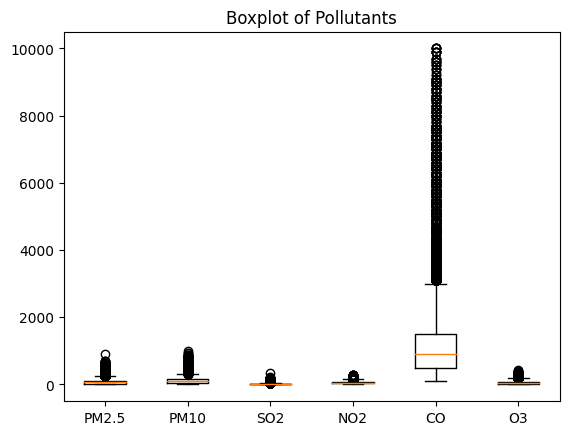

In [ ]:
#check the outliers from selected column
plt.boxplot([data2['PM2.5'], data2['PM10'], data2['SO2'],
             data2['NO2'], data2['CO'], data2['O3']])
plt.title('Boxplot of Pollutants')
plt.xticks([1, 2, 3, 4, 5, 6], ['PM2.5', 'PM10', 'SO2','NO2', 'CO', 'O3'])
plt.show()

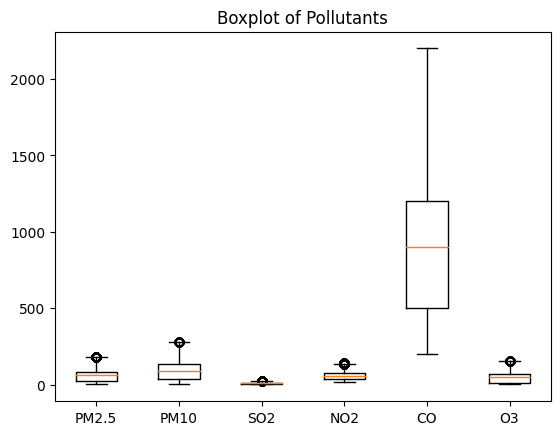

In [ ]:
#handle a lot of outliers of pollutants using IQR
pollutant_column = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in pollutant_column:
  Q1 = data2[col].quantile(0.25)
  Q3 = data2[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q3 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  median = data2[col].median()
  #replace outlier with median
  data2[col] = np.where((data2[col] < lower_bound) | (data2[col] > upper_bound),
                        median, data2[col])
#show boxplot
plt.boxplot([data2['PM2.5'], data2['PM10'], data2['SO2'], data2['NO2'],
             data2['CO'], data2['O3']])
plt.title('Boxplot of Pollutants')
plt.xticks([1, 2, 3, 4, 5, 6], ['PM2.5', 'PM10', 'SO2','NO2', 'CO', 'O3'])
plt.show()

**Handling Missing Values**

Fill missing values with the mean and use the `ffill` and `bfill` methods for the `wd` column.

**Column Date**

Combine the `year`, `month`, and `day` columns into a single column and convert the datatype to `datetime` for time-based data visualization.

**Outliers**

Before handling the outliers, CO has more than 10000 outliers, which highly affect the data, now CO is in the normal range (around 0-3000). The boxplot shows that the distribution of other variables (PM2.5, PM10, SO2, NO2, and O3) has also improved, with a reduction in the number of outliers and a more balanced distribution.

## Exploratory Data Analysis

In [ ]:
print(data2.columns)

Index(['No', 'date', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2',
       'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM',
       'station', 'all_pollutant_avg', 'direction_degrees'],
      dtype='object')


In [ ]:
#find the highest value each pollutant
max_pm25 = data2[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].max()
print(f'The highest PM2.5 : {max_pm25}')

The highest PM2.5 : PM2.5     183.0000
PM10      279.0000
SO2        25.4184
NO2       140.0000
CO       2200.0000
O3        154.0000
dtype: float64


In [ ]:
data2 = data2.set_index('date')
#retrieve data from the selected column
data2['all_pollutant_avg'] = data2[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean(axis=1)
year_pollutant_avg = data2.groupby(data2.index.year)[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
year_pollutant_avg['all_pollutant_avg'] = year_pollutant_avg.mean(axis=1)

#find years with the highest mean
year_max = year_pollutant_avg['all_pollutant_avg'].idxmax()
mean_max = year_pollutant_avg['all_pollutant_avg'].max()

print(f'The year with the highest mean pollutant is {year_max} with a mean of {mean_max}')

The year with the highest mean pollutant is 2013 with a mean of 204.9761465747491


In [ ]:
#calculate the average of the maximum pollutant value for each year
max_pollutant = year_pollutant_avg.idxmax(axis=1)
print(max_pollutant)

date
2013    CO
2014    CO
2015    CO
2016    CO
2017    CO
dtype: object


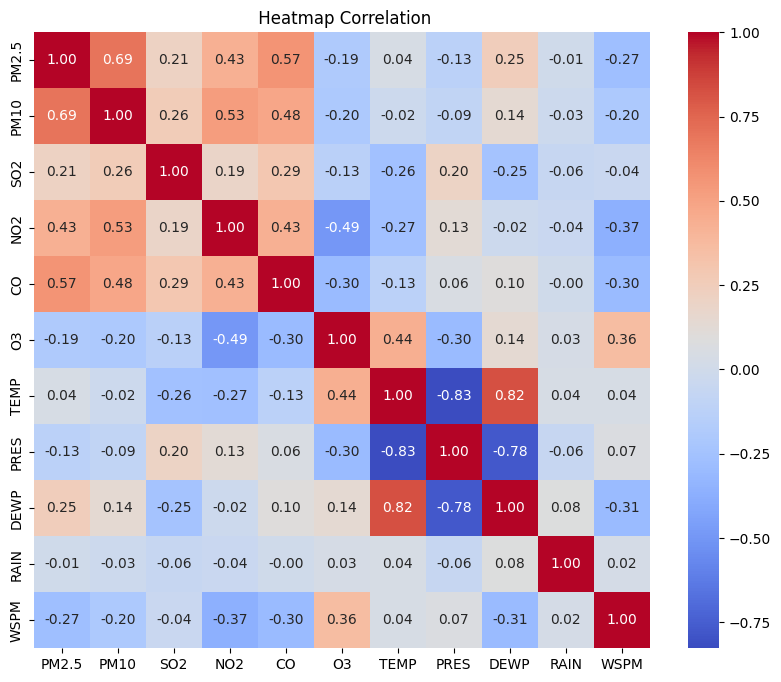

In [ ]:
#correlation all pollutants
correlation = data2[['PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm',square=True)
plt.title(" Heatmap Correlation")
plt.show()

**Insights**

- The year with the highest mean of pollutant concentration is in 2013
- The highest pollutant average every year is CO.

**Correlation**
- PM2.5 and PM10 is strongly positive indicates that when PM2.5 increase, PM10 also tend to increase
- Another variable that have positive correlation is between PM2.5 and NO2 shows that these pollutants tend to increase together
- The relationship between TEMP and DEWP is typically positive, this because the warmer air can hold moisture, so when the temp goes up, the dew point also increase

## Explanatory Analysis & Visualization

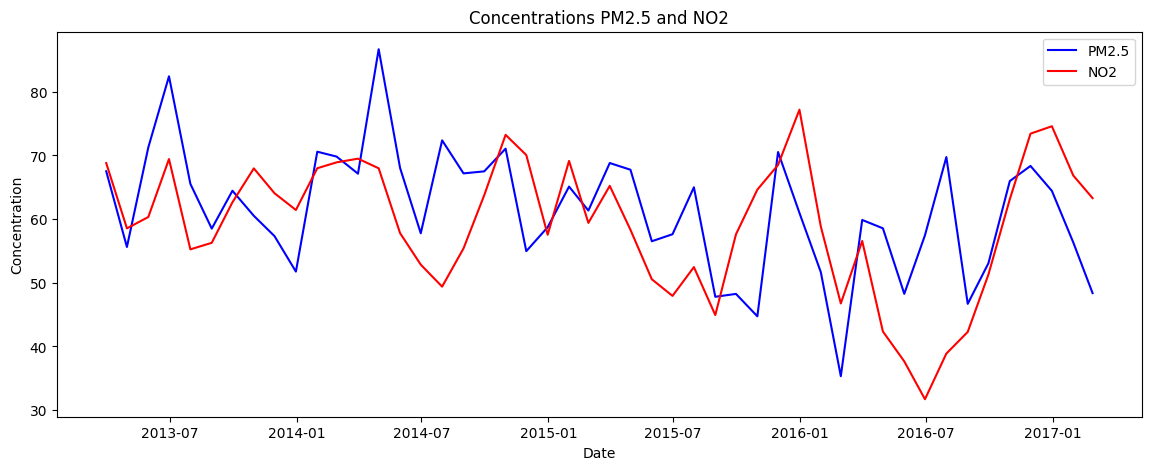

In [ ]:
#count mean to calculating PM2.5 and NO2
data2['date'] = pd.to_datetime(data2[['year', 'month', 'day']])
#set date to index
data2.set_index('date', inplace=True)
plt.figure(figsize=(14,5))
pollutions_data =  data2[[ 'PM2.5', 'NO2']].resample('M').mean()
plt.plot(pollutions_data['PM2.5'], label='PM2.5', color='b')
plt.plot(pollutions_data['NO2'], label='NO2', color='r')
plt.legend()
plt.title('Concentrations PM2.5 and NO2')
plt.ylabel('Concentration')
plt.xlabel('Date')
plt.show()

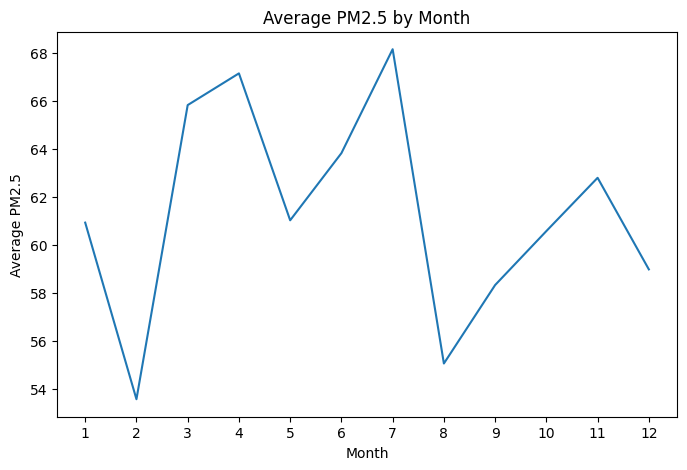

month
7     68.165596
4     67.157997
3     65.834149
6     63.827621
11    62.799855
5     61.026216
1     60.929247
10    60.576975
12    58.978054
9     58.324390
8     55.050271
2     53.559297
Name: PM2.5, dtype: float64


In [ ]:
#count average pm2.5 by month
month_avg = data2.groupby('month')['PM2.5'].mean()
plt.figure(figsize=(8,5))
plt.plot(month_avg.index, month_avg.values)
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.title('Average PM2.5 by Month')
plt.xticks(range(1, 13))
plt.show()

month_avg = month_avg.sort_values(ascending=False)
print(month_avg)

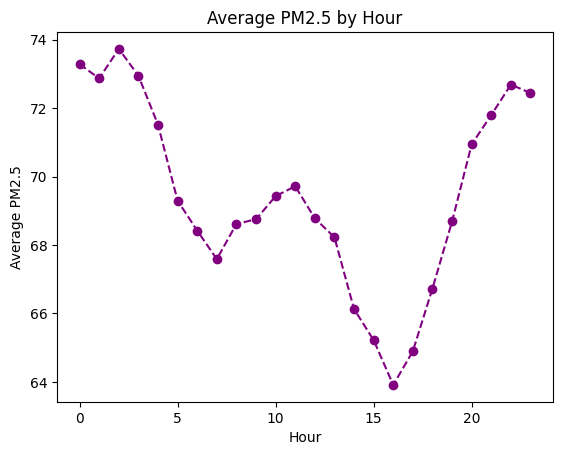

hour
2     73.725979
0     73.281986
3     72.946336
1     72.863625
22    72.682926
23    72.440645
21    71.795694
4     71.513025
20    70.939103
11    69.715639
10    69.426912
5     69.293348
12    68.777331
9     68.752341
19    68.686701
8     68.613641
6     68.421087
13    68.225899
7     67.586518
18    66.727610
14    66.129920
15    65.221237
17    64.898197
16    63.913964
Name: PM2.5, dtype: float64


In [ ]:
#count average PM2.5 by hour and visualize with plot
hour_avg = data2.groupby('hour')['PM2.5'].mean()
plt.plot(hour_avg.index, hour_avg.values, color='purple', marker='o', linestyle='--')
plt.xlabel('Hour')
plt.ylabel('Average PM2.5')
plt.title('Average PM2.5 by Hour')
plt.show()

#sort PM2.5 descending
hour_avg = hour_avg.sort_values(ascending=False)
print(hour_avg)

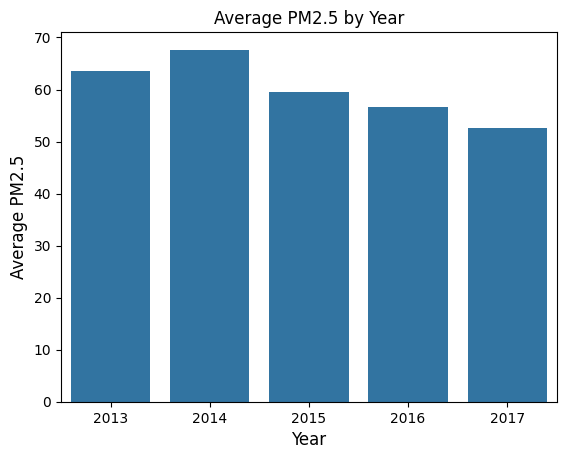

In [ ]:
#count average PM2.5 by year (2013 - 2017) to looking for the highest pollution
year_avg = data2.groupby('year')['PM2.5'].mean()
year_avg_sort = year_avg.sort_values(ascending=False)
sns.barplot(x=year_avg_sort.index, y=year_avg_sort.values)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average PM2.5', fontsize=12)
plt.title('Average PM2.5 by Year', fontsize=12)
plt.show()

In [ ]:
# make function to change wind direction into degrees
def find_angle(direction):
    direction_degrees = {
        'NE': 45, 'E': 90, 'SE': 135, 'S': 180,
        'SW': 225, 'W': 270, 'NW': 315, 'N': 360,
    }
    return direction_degrees.get(direction)

# change wind direction to a list
direction_degrees_list = []
for direction in data2['wd']:
    angle = find_angle(direction)
    direction_degrees_list.append(angle)

# add column direction_degrees to dataframe
data2['direction_degrees'] = direction_degrees_list

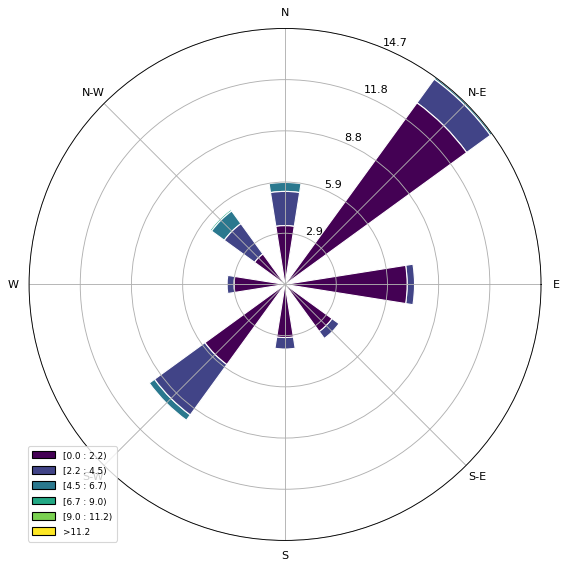

In [ ]:
#display the windrose to see the source of the wind
ax = WindroseAxes.from_ax()
ax.bar(data2['direction_degrees'], data2['WSPM'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

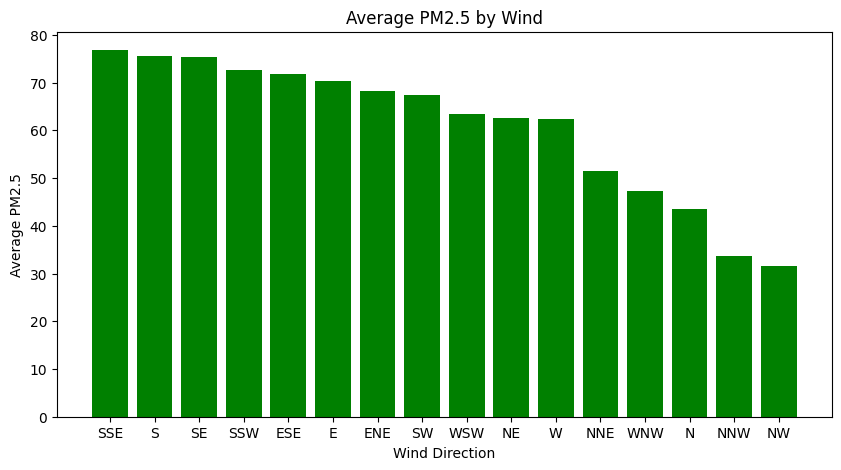

wd
SSE    76.810694
S      75.564678
SE     75.302027
SSW    72.636296
ESE    71.819217
Name: PM2.5, dtype: float64


In [ ]:
#grouping data by wind and count the average
wind_direction_counts = data2.groupby('wd')['PM2.5'].mean()
wind_direction_counts = wind_direction_counts.sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(wind_direction_counts.index, wind_direction_counts.values, color='green')
plt.title('Average PM2.5 by Wind')
plt.xlabel('Wind Direction')
plt.ylabel('Average PM2.5')
plt.show()

#count average from max to min wind directions
print(wind_direction_counts.head())

In [ ]:
#reset index, save to column
data2 = data2.reset_index()
column_date = data2.pop('date')
data2.insert(1, 'date', column_date)

In [ ]:
data2.to_csv("Air_Quality_Aotizhongxin.csv", index=False)

**Conclusion**

1. Temperature and wind speed are negatively correlated with PM2.5, by this data we know that pollution tends to be higher when temperatures are low and wind speeds are low. Compared with NO2, both pollutants show a seasonal pattern especially in cold weather. However, there are situations when both pollutant fluctuate differently, indicating that are additional sources of pollution that are more specific to one pollutant. This may indicate that these pollutants are influenced by transportation activities, industry, or certain atmospheric conditions that increase pollution levels in certain seasons

2. After reviewing the data above, the highest air pollution levels occurred in 2017, with the greatest concentrations of pollutants observed during the spring and summer months, that is, in July (68.17), followed by April (67.16) and March (65.83). The lowest pollution occurs during winter, this could be due to human activity or an atmospheric condition such as wind or rain, helping to clear the pollutants from the air, which tends to be higher in the morning and night.

3. Air quality is poor when coming from the east(SSE, S, SE). The wind speed from this direction tend to be lower and has higher concentrations of PM2.5. This shows that low winds that came from the south-southeast tend to have higher air pollution (PM2.5).While  the air quality tends to be better when coming from the NE or northeast because of the wind has the higher speed that can "cleaned" the area from pollution.

